In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

from PLred.visPLred import couplingmap as cm

In [2]:
import importlib
importlib.reload(cm)

<module 'PLred.visPLred.couplingmap' from '/home/first/yjkim/PLred/PLred/visPLred/couplingmap.py'>

### Import data and make SimultaneousData object

In [13]:
firstcam_timestamp_path = '/mnt/datazpool/PL/20250211/firstpl/'
firstcam_spec_path =      '/home/first/yjkim/reduced/betcmi_20250211/'
obs_start = '12:11:00'
obs_end   = '12:19:09'


psfcam = 'palila'
psfcam_frames_name = '/home/first/yjkim/reduced/betcmi_20250211/betcmi_20250211/first_palila_matched_fastcam_matched_frames.npy'
psfcam_timestamp_name = '/home/first/yjkim/reduced/betcmi_20250211/betcmi_20250211/first_palila_matched.pkl'

sd = cm.SimultaneousData(firstcam_timestamp_path, firstcam_spec_path,
                 obs_start, obs_end,
                 psfcam, 
                 psfcam_frames_name, psfcam_timestamp_name)

number of files found: 49
number of files found: 49
Timestamp1 start: 2025-02-11 12:11:08.504036, end 2025-02-11 12:19:18.886058, length 49000 
Timestamp2 start: 2025-02-11 12:00:07.905739, end 2025-02-11 12:19:18.866043, length 114998 
Filtered 2 out of timestamp1, 66000 out of timestamp2


Compute centroids

In [14]:
sd.compute_psfcam_centroids(peak=True)

Bin by centroids, for now without any frame selection

/home/first/miniconda3/envs/sklearn-env/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/first/miniconda3/envs/sklearn-env/lib/python3.13/site-packages/numpy/_core/_methods.py:137: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


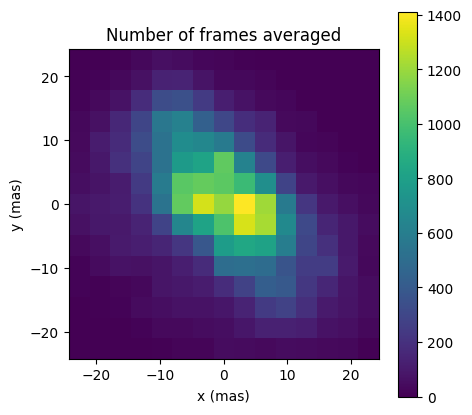

In [15]:
sd.bin_by_centroids(15, 3, calculate_variance = False)

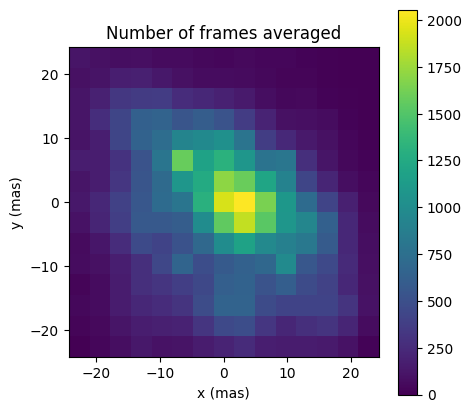

In [19]:
sd.bin_by_centroids(15, 3, calculate_variance = False)

Weird artifact is present (probably due to PSF splitting). Try frame selection

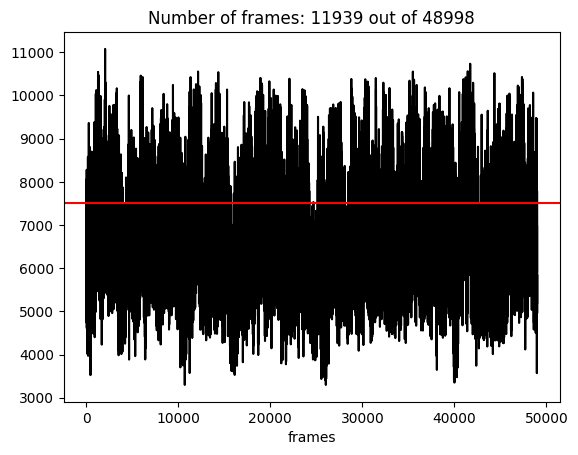

In [16]:
plt.plot(np.nanmax(sd.psfcam_frames, axis=(1,2)), color='black')
plt.xlabel('frames')

threshold = 7500
plt.axhline(threshold, color='red')

idx = np.nanmax(sd.psfcam_frames, axis=(1,2)) > threshold

plt.title(f'Number of frames: {np.sum(idx)} out of {len(idx)}')
plt.show()

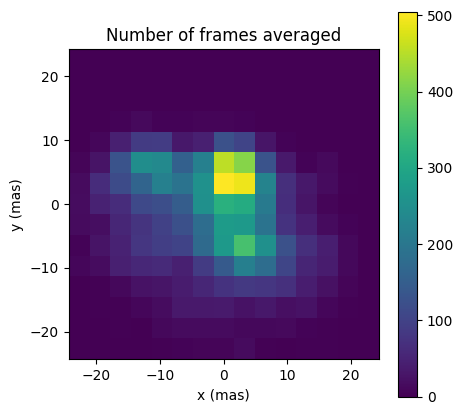

In [17]:
sd.bin_by_centroids(15, 3, effective_idx= idx,
                    calculate_variance = False)

# sd.bin_by_centroids(15, 3, effective_idx= idx,
#                     calculate_variance = False)

In [ ]:
sd.bin_by_centroids(15, 3, effective_idx= idx,
                    calculate_variance = True)

## now Regulus

In [18]:
firstcam_timestamp_path = '/mnt/datazpool/PL/20250211/firstpl/'
firstcam_spec_path =      '/home/first/yjkim/reduced/regulus_20250211/'
obs_start = '12:40:00'
obs_end   = '12:51:56'


psfcam = 'palila'
psfcam_frames_name = '/home/first/yjkim/reduced/regulus_20250211/regulus_20250211/first_palila_matched_fastcam_matched_frames.npy'
psfcam_timestamp_name = '/home/first/yjkim/reduced/regulus_20250211/regulus_20250211/first_palila_matched.pkl'

sd = cm.SimultaneousData(firstcam_timestamp_path, firstcam_spec_path,
                 obs_start, obs_end,
                 psfcam, 
                 psfcam_frames_name, psfcam_timestamp_name)

number of files found: 143
number of files found: 143
Timestamp1 start: 2025-02-11 12:40:04.243050, end 2025-02-11 12:52:00.940162, length 143000 
Timestamp2 start: 2025-02-11 12:29:32.816742, end 2025-02-11 12:52:00.930085, length 268998 
Filtered 2 out of timestamp1, 126000 out of timestamp2


In [19]:
sd.compute_psfcam_centroids(peak=True)


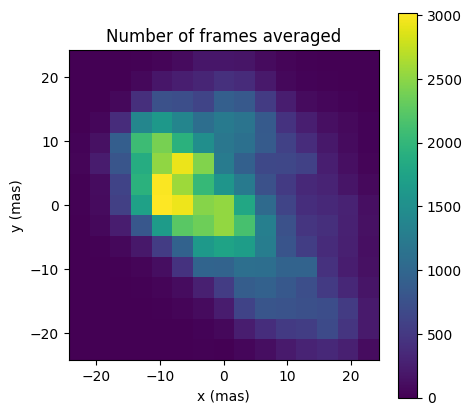

In [20]:
sd.bin_by_centroids(15, 3, calculate_variance = False)


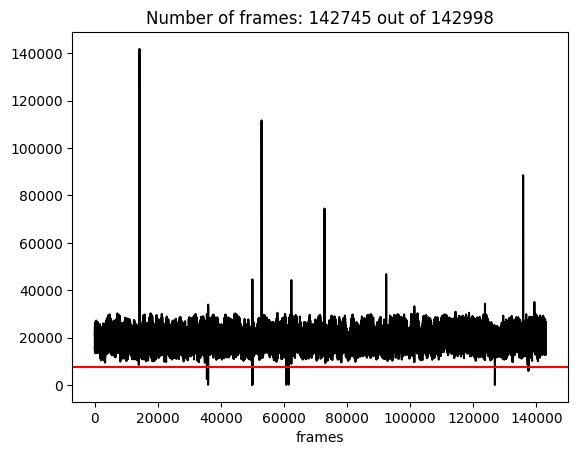

In [21]:
plt.plot(np.nanmax(sd.psfcam_frames, axis=(1,2)), color='black')
plt.xlabel('frames')

threshold = 7500
plt.axhline(threshold, color='red')

idx = np.nanmax(sd.psfcam_frames, axis=(1,2)) > threshold

plt.title(f'Number of frames: {np.sum(idx)} out of {len(idx)}')
plt.show()

In [10]:
from ..imageutils import subpixel_centroid_2d
from scipy.ndimage import center_of_mass

ImportError: attempted relative import with no known parent package

There is definitely preferential jitter. Let's inspect how the couplingmaps look...

In [11]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

## below is Beta CMi

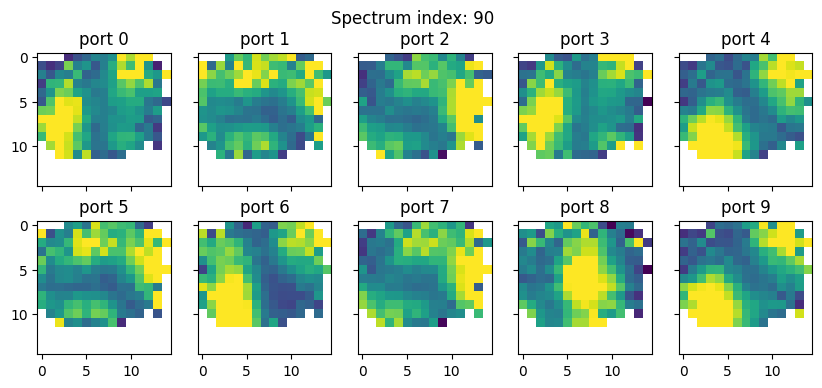

In [12]:
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(10,4), sharex=True, sharey=True)
axs = axs.flatten()

def animate(specind):
    for fibind in range(10):
        axs[fibind].clear()
        axs[fibind].imshow(sd.firstcam_binned_frames[:,:,fibind,specind] / np.nansum(sd.firstcam_binned_frames[:,:,fibind,specind]),
              vmin=0, vmax=0.010) #,
            #   extent = (sd.xmin, sd.xmax, sd.ymin, sd.ymax))
        axs[fibind].set_title('port %d' % fibind)


        # pad = 71 # deg (position angle of dec. axis)

        # xc = 12
        # yc = 7

        # dx = -4*np.cos(np.radians(pad))
        # dy = -4*np.sin(np.radians(pad))
        # axs[fibind].plot([xc, xc+dx], [yc, yc+dy], 'r')
        # axs[fibind].text(xc+dx, yc+dy, 'N', color='r', fontsize=12)

        # axs[fibind].plot([xc, xc+dy], [yc, yc-dx], 'r')
        # axs[fibind].text(xc+dy, yc-dx, 'E', color='r', fontsize=12)

        # disk_PA = 139
        # dx_disk = -5*np.cos(np.radians(pad - disk_PA))
        # dy_disk = -5*np.sin(np.radians(pad - disk_PA))

        # axs[fibind].plot([xc, xc+dx_disk], [yc, yc+dy_disk], 'yellow')
        # axs[fibind].text(xc+dx_disk, yc+dy_disk, 'disk', color='yellow', fontsize=12)

    fig.suptitle(f'Spectrum index: {specind}')

anim = FuncAnimation(fig, animate, frames = np.arange(90,120))
HTML(anim.to_jshtml())

## Below is Regulus

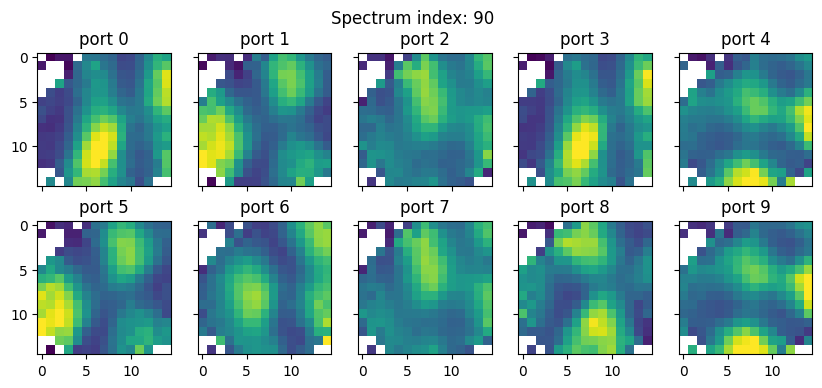

In [ ]:
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(10,4), sharex=True, sharey=True)
axs = axs.flatten()

def animate(specind):
    for fibind in range(10):
        axs[fibind].clear()
        axs[fibind].imshow(sd.firstcam_binned_frames[:,:,fibind,specind] / np.nansum(sd.firstcam_binned_frames[:,:,fibind,specind]),
              vmin=0, vmax=0.010) #,
            #   extent = (sd.xmin, sd.xmax, sd.ymin, sd.ymax))
        axs[fibind].set_title('port %d' % fibind)


        # pad = 71 # deg (position angle of dec. axis)

        # xc = 12
        # yc = 7

        # dx = -4*np.cos(np.radians(pad))
        # dy = -4*np.sin(np.radians(pad))
        # axs[fibind].plot([xc, xc+dx], [yc, yc+dy], 'r')
        # axs[fibind].text(xc+dx, yc+dy, 'N', color='r', fontsize=12)

        # axs[fibind].plot([xc, xc+dy], [yc, yc-dx], 'r')
        # axs[fibind].text(xc+dy, yc-dx, 'E', color='r', fontsize=12)

        # disk_PA = 139
        # dx_disk = -5*np.cos(np.radians(pad - disk_PA))
        # dy_disk = -5*np.sin(np.radians(pad - disk_PA))

        # axs[fibind].plot([xc, xc+dx_disk], [yc, yc+dy_disk], 'yellow')
        # axs[fibind].text(xc+dx_disk, yc+dy_disk, 'disk', color='yellow', fontsize=12)

    fig.suptitle(f'Spectrum index: {specind}')

anim = FuncAnimation(fig, animate, frames = np.arange(90,120))
HTML(anim.to_jshtml())

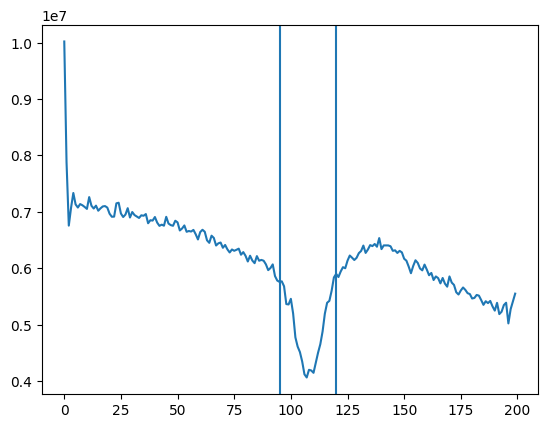

In [56]:
plt.plot(np.nansum(sd.firstcam_binned_frames,axis=(0,1,2)))
plt.axvline(95)
plt.axvline(120)

In [25]:
np.shape(sd.firstcam_binned_frames)

(15, 15, 38, 200)

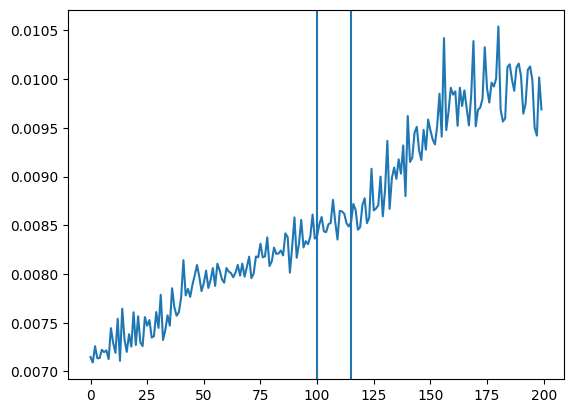

In [53]:
fibind = 0
plt.plot(sd.firstcam_binned_frames[8,8,fibind] / np.nansum(sd.firstcam_binned_frames,axis=(0,1))[fibind])
# plt.plot(sd.firstcam_binned_frames[7,7,1])
plt.axvline(100)
plt.axvline(115)

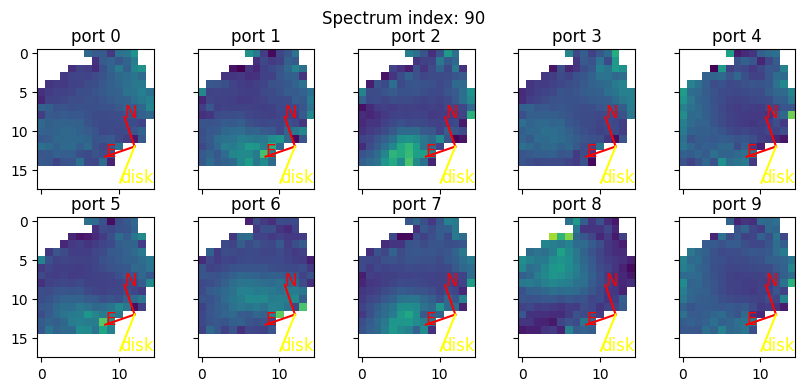

In [101]:
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(10,4), sharex=True, sharey=True)
axs = axs.flatten()

def animate(specind):
    for fibind in range(10):
        axs[fibind].clear()
        axs[fibind].imshow(sd.firstcam_binned_frames[:,:,fibind,specind] / np.nansum(sd.firstcam_binned_frames[:,:,fibind,specind]),
              vmin=0, vmax=0.02) #,
            #   extent = (sd.xmin, sd.xmax, sd.ymin, sd.ymax))
        axs[fibind].set_title('port %d' % fibind)


        pad = 71 # deg (position angle of dec. axis)

        xc = 12
        yc = 12

        dx = -4*np.cos(np.radians(pad))
        dy = -4*np.sin(np.radians(pad))
        axs[fibind].plot([xc, xc+dx], [yc, yc+dy], 'r')
        axs[fibind].text(xc+dx, yc+dy, 'N', color='r', fontsize=12)

        axs[fibind].plot([xc, xc+dy], [yc, yc-dx], 'r')
        axs[fibind].text(xc+dy, yc-dx, 'E', color='r', fontsize=12)

        disk_PA = 139
        dx_disk = -5*np.cos(np.radians(pad - disk_PA))
        dy_disk = -5*np.sin(np.radians(pad - disk_PA))

        axs[fibind].plot([xc, xc+dx_disk], [yc, yc+dy_disk], 'yellow')
        axs[fibind].text(xc+dx_disk, yc+dy_disk, 'disk', color='yellow', fontsize=12)

    fig.suptitle(f'Spectrum index: {specind}')

anim = FuncAnimation(fig, animate, frames = np.arange(90,120))
HTML(anim.to_jshtml())

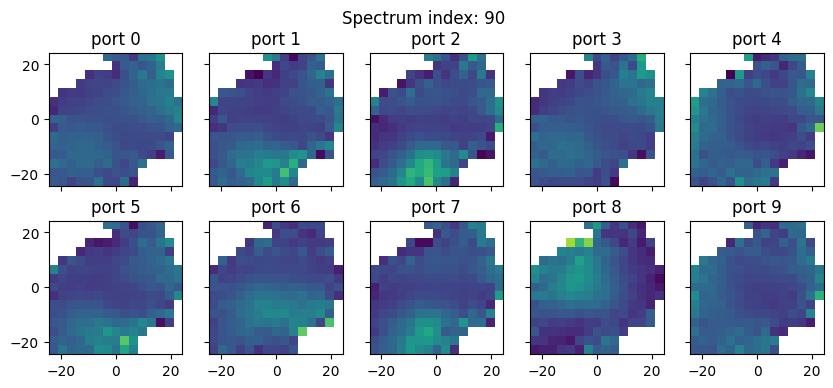

In [77]:
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(10,4), sharex=True, sharey=True)
axs = axs.flatten()

def animate(specind):
    for fibind in range(10):
        axs[fibind].clear()
        axs[fibind].imshow(sd.firstcam_binned_frames[:,:,fibind,specind] / np.nansum(sd.firstcam_binned_frames[:,:,fibind,specind]),
              vmin=0, vmax=0.02,
              extent = (sd.xmin, sd.xmax, sd.ymin, sd.ymax))
        axs[fibind].set_title('port %d' % fibind)
    fig.suptitle(f'Spectrum index: {specind}')

anim = FuncAnimation(fig, animate, frames = np.arange(90,120))
HTML(anim.to_jshtml())

Now compute variance by bootstrap. Note this takes a while. (for this script, it took 3m30s)

/home/first/miniconda3/envs/sklearn-env/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/first/miniconda3/envs/sklearn-env/lib/python3.13/site-packages/numpy/_core/_methods.py:137: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


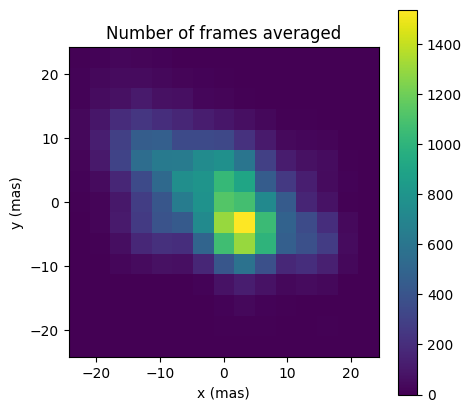

/home/first/yjkim/PLred/PLred/visPLred/couplingmap.py:57: RuntimeWarning: Mean of empty slice
  bootstrap_frames[k,i,j] = np.nanmean(firstcamframes[resampled_idx], axis = 0)
/home/first/yjkim/PLred/PLred/visPLred/couplingmap.py:64: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = np.nanvar(bootstrap_frames, axis = 0)
/home/first/yjkim/PLred/PLred/visPLred/couplingmap.py:67: RuntimeWarning: Degrees of freedom <= 0 for slice.
  normvar = np.nanvar(bootstrap_normframes, axis=0)


In [85]:
sd.bin_by_centroids(15, 3, effective_idx= idx, calculate_variance = True)

In [86]:
sd.save('betcmi_20240917_couplingmap.fits')

Also inspect PSFs how they look like

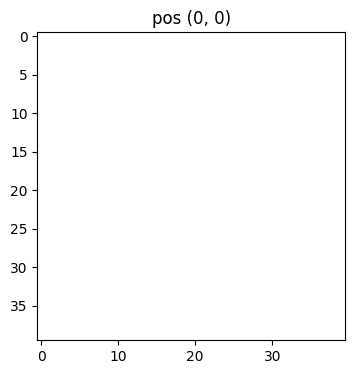

In [94]:

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)

def animate(posind):
    ax.clear()
    posx = posind // 15
    posy = posind % 15
    ax.imshow(sd.psfcam_binned_frames[posx,posy,:,:])
    ax.set_title('pos (%d, %d)' % (posx, posy))

anim = FuncAnimation(fig, animate, frames = 225)
HTML(anim.to_jshtml())


Now we are ready to proceed to modeling coupling maps and attempting image reconstruction using PLred!